In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
cpi=pd.read_csv("inflation-of-consumer-prices.csv")
cpi.head()

,Entity,Code,Year,"Inflation, consumer prices (annual %)"
0,Australia,AUS,1960,3.728814
1,Austria,AUT,1960,1.945749
2,Belgium,BEL,1960,0.299467
3,Bolivia,BOL,1960,11.533153
4,Burkina Faso,BFA,1960,7.788162


           infl      years
23     1.779878 1960-01-01
89     1.695213 1961-01-01
157    3.632215 1962-01-01
227    2.946161 1963-01-01
297   13.355261 1964-01-01
...         ...        ...
8546   3.729506 2019-01-01
8736   6.623437 2020-01-01
8925   5.131407 2021-01-01
9114   6.699034 2022-01-01
9302   5.649143 2023-01-01

[64 rows x 2 columns]


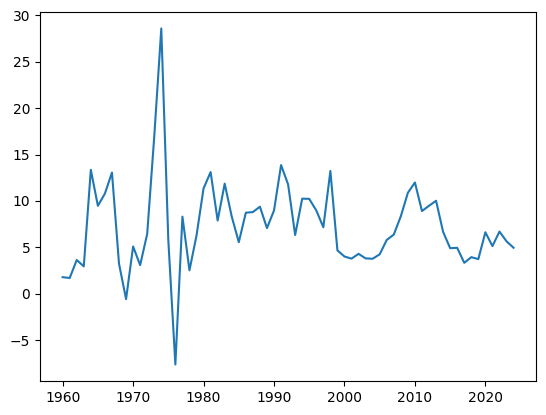

In [3]:

country="India"
data=cpi[cpi["Entity"]==country].sort_values("Year")
cp=data['Inflation, consumer prices (annual %)']
years = pd.to_datetime(data["Year"], format="%Y")
cp.head()
cp.tail()
plt.plot(years, cp)
values=pd.DataFrame({"infl":cp,"years":years})
print(values.iloc[:64])





In [4]:
from statsmodels.tsa.stattools import adfuller

diffrence=cp.dropna()
result1=adfuller(diffrence)
print(result1[0])
print(result1[1])
 

if result1[1]<0.05:
    print("ok")
else:
    print("not ok")

-5.3051337383864885
5.343157742930871e-06
ok


<function plot_pacf at 0x0000027A0D89C860>
-------------


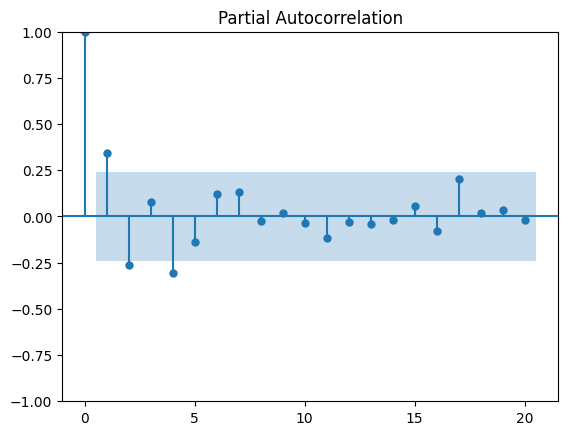

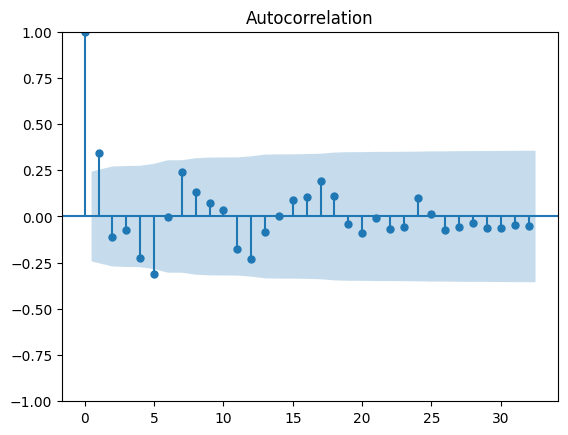

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(cp.dropna(),lags=20)
plot_acf(cp.dropna(),lags=32)
print(plot_pacf)
print("-------------")
plt.show(plot_acf)





p=1,2,4 q=1,5 (1,0 1) (1,0,5)(2,0,1) (2,0,5 ) (4,0,1 )(4,0,5)

usa (2,1,2) 

In [6]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
import numpy as np
data["Year"]=pd.to_datetime(data["Year"], format="%Y")
X=data[["Year"]]  
y=data.set_index("Year")["Inflation, consumer prices (annual %)"].dropna()
p=[1,2,4]
d=[0]
q=[1,5]

results=[]
train_test_sizes=[[0.60,0.1],[0.70,0.1],[ 0.80,0.1],[0.90,0.1]]


for pv in p:
    for dv in d:
        for qv in q:
            temp=[] 
            print(f"order({pv},{dv},{qv})")
            print()
            for size1,size2 in train_test_sizes:
                print(f"ttsize({size1},{size2})")
                
                X_train,X_test,y_train,y_test=train_test_split(X, y,train_size=size1,test_size=size2,shuffle=False)
                model=ARIMA(y_train,order=(pv,dv,qv))   
                result=model.fit()
                start=len(y_train)
                end=len(y_train)+len(y_test)-1
                predictions = result.predict(start=start, end=end, typ="levels")
                predictions.index = X_test["Year"].values
                fitted_vals=result.fittedvalues
                fitted_vals.index=y_train.index

                trainr=rmse(y_train,fitted_vals)
                testr=rmse(y_test,predictions)
                diff=trainr-testr
                results.append((pv,dv,qv,trainr,testr,diff))
                temp.append((trainr,testr))
                diff=trainr-testr
                print("rms train",trainr)
                print("rms test",testr)
                print('diff',diff)
                print()
                
            temp_arr=np.array(temp)
            mtrain=np.mean(temp_arr[:,0])
            stdtrain=np.std(temp_arr[:,0])
            mtest=np.mean(temp_arr[:,1])
            stdtest=np.std(temp_arr[:,1])
            print(f"mean trainr{mtrain:.2f},std{stdtrain:.2f}")
            print(f" mean testr{mtest:.2f},std{stdtest:.2f}")
            print("-"*50)



order(1,0,1)

ttsize(0.6,0.1)
rms train 5.080829007819806
rms test 4.530314415058597
diff 0.5505145927612087

ttsize(0.7,0.1)
rms train 4.961345338183285
rms test 2.540169435937051
diff 2.4211759022462336

ttsize(0.8,0.1)
rms train 4.674121135680682
rms test 2.8771278445808735
diff 1.7969932910998088

ttsize(0.9,0.1)
rms train 4.478991716660696
rms test 2.31383506381252
diff 2.165156652848176

mean trainr4.80,std0.24
 mean testr3.07,std0.87
--------------------------------------------------
order(1,0,5)

ttsize(0.6,0.1)
rms train 4.711366061267024
rms test 5.203304925530117
diff -0.4919388642630924

ttsize(0.7,0.1)
rms train 4.636115338162312
rms test 3.1647088044848215
diff 1.4714065336774902

ttsize(0.8,0.1)
rms train 4.393812759949248
rms test 3.089788955168408
diff 1.3040238047808401

ttsize(0.9,0.1)
rms train 4.2237223375875725
rms test 4.036572385185575
diff 0.18714995240199794

mean trainr4.49,std0.19
 mean testr3.87,std0.85
--------------------------------------------------
ord

In [7]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(cp,order=(0,0,1))
res=model.fit()
print(res.summary())

                                         SARIMAX Results                                         
Dep. Variable:     Inflation, consumer prices (annual %)   No. Observations:                   65
Model:                                    ARIMA(0, 0, 1)   Log Likelihood                -186.890
Date:                                   Fri, 31 Oct 2025   AIC                            379.780
Time:                                           21:49:16   BIC                            386.303
Sample:                                                0   HQIC                           382.354
                                                    - 65                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2711      0.863      8.425      0.000    

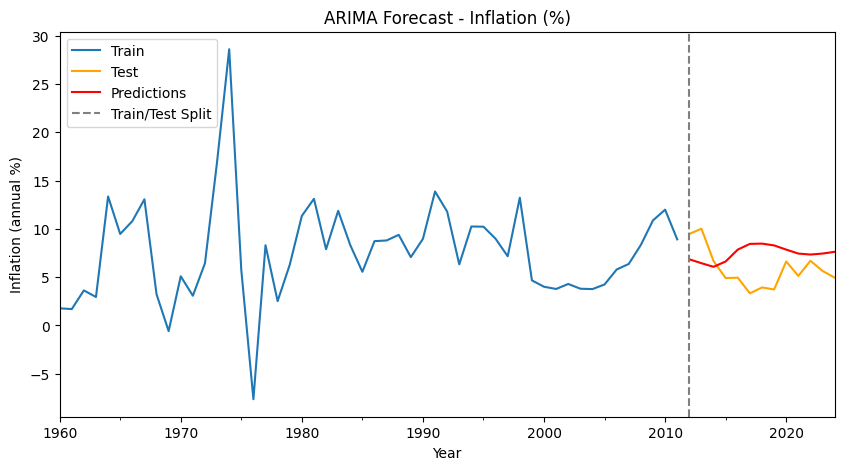

               Actual  Predicted  Difference
2012-01-01   9.478997   6.850788    2.628209
2013-01-01  10.017879   6.446988    3.570891
2014-01-01   6.665657   6.071482    0.594174
2015-01-01   4.906973   6.627185   -1.720212
2016-01-01   4.948216   7.856397   -2.908181
2017-01-01   3.328173   8.446637   -5.118464
2018-01-01   3.938827   8.473234   -4.534408
2019-01-01   3.729506   8.290226   -4.560721
2020-01-01   6.623437   7.853572   -1.230135
2021-01-01   5.131407   7.444890   -2.313483
2022-01-01   6.699034   7.342991   -0.643957
2023-01-01   5.649143   7.446052   -1.796909
2024-01-01   4.953035   7.624962   -2.671927


In [16]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Make sure Year is datetime
data["Year"] = pd.to_datetime(data["Year"], format="%Y")


X = data[["Year"]]
y = data.set_index("Year")["Inflation, consumer prices (annual %)"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=False)


model = ARIMA(y_train, order=(4,0,1))
result = model.fit()

# Forecast
start = len(y_train)
end = len(y_train) + len(y_test) - 1
predictions = result.predict(start=start, end=end, typ="levels")
predictions.index = X_test["Year"].values

# Plot
plt.figure(figsize=(10,5))
y_train.plot(label="Train")
y_test.plot(label="Test", color="orange")
predictions.plot(label="Predictions", color="red")
plt.axvline(y_test.index[0], color="gray", linestyle="--", label="Train/Test Split")
plt.legend()
plt.title("ARIMA Forecast - Inflation (%)")
plt.xlabel("Year")
plt.ylabel("Inflation (annual %)")
plt.show()
comparison = pd.DataFrame({
    "Actual": y_test,
    "Predicted": predictions,
    "Difference": y_test - predictions
})
print(comparison)

In [9]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
from statsmodels.tools.eval_measures import rmse

train_rmse = rmse(y_train, result.fittedvalues)
test_rmse = rmse(y_test, predictions)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE : {test_rmse}")


Train RMSE: 4.367256456641613
Test RMSE : 2.9953338472454334


In [11]:
# import warnings
# warnings.filterwarnings("ignore")
# from sklearn.model_selection import train_test_split
# from statsmodels.tools.eval_measures import rmse
# import numpy as np
# data["Year"]=pd.to_datetime(data["Year"], format="%Y")
# X=data[["Year"]]  
# y=data.set_index("Year")["Inflation, consumer prices (annual %)"].dropna()
# p=[2]
# d=[1]
# q=[2]

# results=[]
# train_test_sizes=[[0.60,0.1],[0.70,0.1],[ 0.80,0.1],[0.90,0.1]]


# for pv in p:
#     for dv in d:
#         for qv in q:
#             temp=[] 
#             print(f"order({pv},{dv},{qv})")
#             print()
#             for size1,size2 in train_test_sizes:
#                 print(f"ttsize({size1},{size2})")
                
#                 X_train,X_test,y_train,y_test=train_test_split(X, y,train_size=size1,test_size=size2,shuffle=False)
#                 model=ARIMA(y_train,order=(pv,dv,qv))   
#                 result=model.fit()
#                 start=len(y_train)
#                 end=len(y_train)+len(y_test)-1
#                 predictions = result.predict(start=start, end=end, typ="levels")
#                 predictions.index = X_test["Year"].values
#                 fitted_vals=result.fittedvalues
#                 fitted_vals.index=y_train.index

#                 trainr=rmse(y_train,fitted_vals)
#                 testr=rmse(y_test,predictions)
#                 diff=trainr-testr
#                 results.append((pv,dv,qv,trainr,testr,diff))
#                 temp.append((trainr,testr))
#                 diff=trainr-testr
#                 print("rms train",trainr)
#                 print("rms test",testr)
#                 print('diff',diff)
#                 print()
                
#             temp_arr=np.array(temp)
#             mtrain=np.mean(temp_arr[:,0])
#             stdtrain=np.std(temp_arr[:,0])
#             mtest=np.mean(temp_arr[:,1])
#             stdtest=np.std(temp_arr[:,1])
#             print(f"mean trainr{mtrain:.2f},std{stdtrain:.2f}")
#             print(f" mean testr{mtest:.2f},std{stdtest:.2f}")
#             print("-"*50)



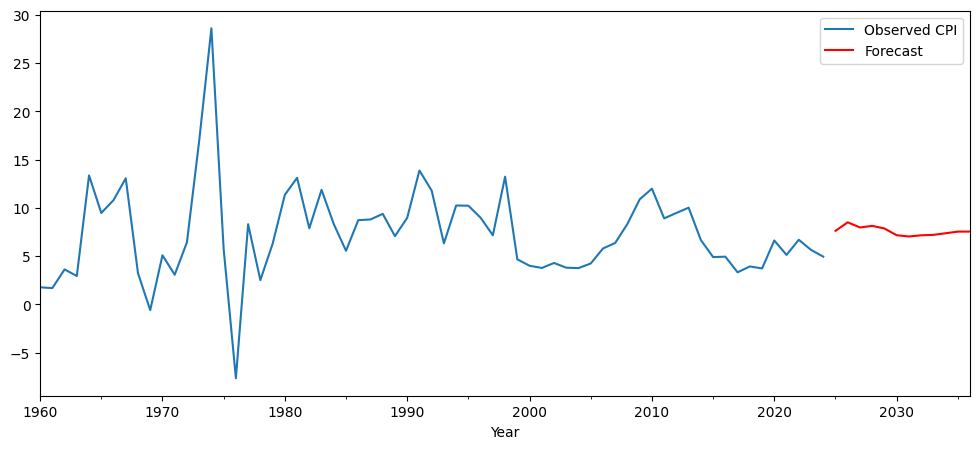

In [18]:
model=ARIMA(y, order=(4,0,1))
result=model.fit()
forecast=result.predict(start=len(y),end=len(y)+12-1,)
last_year=y.index[-1].year
forecast.index=pd.date_range(start=str(last_year+1), periods=12,freq="YE")

plt.figure(figsize=(12,5))
y.plot(label="Observed CPI")
forecast.plot(label="Forecast", color="red")
plt.legend()
plt.show()


In [19]:
forecast_df=pd.DataFrame({"Year":forecast.index,"Forecasted CPI":forecast.values})
print(forecast_df)

         Year  Forecasted CPI
0  2025-12-31        7.623969
1  2026-12-31        8.504810
2  2027-12-31        7.973608
3  2028-12-31        8.135761
4  2029-12-31        7.865121
5  2030-12-31        7.167855
6  2031-12-31        7.038997
7  2032-12-31        7.161193
8  2033-12-31        7.207275
9  2034-12-31        7.373914
10 2035-12-31        7.541341
11 2036-12-31        7.547923


In [14]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split

# Example: assuming 'data' is already filtered for India
data["Year"] = pd.to_datetime(data["Year"], format="%Y")
y = data.set_index("Year")["Inflation, consumer prices (annual %)"].dropna()

# Parameter ranges
p = [1, 2, 4]
d = [0]
q = [1, 5]

# Manual 4-fold CV sizes
train_test_sizes = [[0.60, 0.1], [0.70, 0.1], [0.80, 0.1], [0.90, 0.1]]

results = []

for pv in p:
    for dv in d:
        for qv in q:
            temp = []
            print(f"\nARIMA({pv},{dv},{qv})")
            for size1, size2 in train_test_sizes:
                X = np.arange(len(y)).reshape(-1, 1)  # Dummy X for splitting
                X_train, X_test, y_train, y_test = train_test_split(
                    X, y, train_size=size1, test_size=size2, shuffle=False
                )

                model = ARIMA(y_train, order=(pv, dv, qv))
                result = model.fit()

                start = len(y_train)
                end = len(y_train) + len(y_test) - 1
                preds = result.predict(start=start, end=end, typ="levels")

                train_rmse = rmse(y_train, result.fittedvalues)
                test_rmse = rmse(y_test, preds)

                print(f"Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
                temp.append((train_rmse, test_rmse))

            temp = np.array(temp)
            mean_train = np.mean(temp[:, 0])
            mean_test = np.mean(temp[:, 1])
            results.append((pv, dv, qv, mean_train, mean_test))

# Show all results
cv_results = pd.DataFrame(results, columns=["p", "d", "q", "Mean Train RMSE", "Mean Test RMSE"])
print("\nCross-Validation Summary:")
print(cv_results)

# Best model based on lowest test RMSE
best_model = cv_results.loc[cv_results["Mean Test RMSE"].idxmin()]
print(f"\nBest Model: ARIMA({int(best_model.p)},{int(best_model.d)},{int(best_model.q)}) "
      f"with Test RMSE={best_model['Mean Test RMSE']:.2f}")



ARIMA(1,0,1)
Train RMSE: 5.08 | Test RMSE: 4.53
Train RMSE: 4.96 | Test RMSE: 2.54
Train RMSE: 4.67 | Test RMSE: 2.88
Train RMSE: 4.48 | Test RMSE: 2.31

ARIMA(1,0,5)
Train RMSE: 4.71 | Test RMSE: 5.20
Train RMSE: 4.64 | Test RMSE: 3.16
Train RMSE: 4.39 | Test RMSE: 3.09
Train RMSE: 4.22 | Test RMSE: 4.04

ARIMA(2,0,1)
Train RMSE: 5.08 | Test RMSE: 4.43
Train RMSE: 4.93 | Test RMSE: 2.61
Train RMSE: 4.65 | Test RMSE: 2.94
Train RMSE: 4.46 | Test RMSE: 2.44

ARIMA(2,0,5)
Train RMSE: 4.38 | Test RMSE: 4.76
Train RMSE: 4.58 | Test RMSE: 3.68
Train RMSE: 4.38 | Test RMSE: 3.02
Train RMSE: 4.20 | Test RMSE: 3.27

ARIMA(4,0,1)
Train RMSE: 4.53 | Test RMSE: 4.16
Train RMSE: 4.54 | Test RMSE: 4.90
Train RMSE: 4.37 | Test RMSE: 3.34
Train RMSE: 4.19 | Test RMSE: 3.35

ARIMA(4,0,5)
Train RMSE: 4.34 | Test RMSE: 4.92
Train RMSE: 4.40 | Test RMSE: 4.07
Train RMSE: 4.23 | Test RMSE: 3.95
Train RMSE: 4.10 | Test RMSE: 3.03

Cross-Validation Summary:
   p  d  q  Mean Train RMSE  Mean Test RMSE
0  1 

In [15]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import TimeSeriesSplit

# Assuming 'data' is already filtered for the country (e.g., India)
data["Year"] = pd.to_datetime(data["Year"], format="%Y")
y = data.set_index("Year")["Inflation, consumer prices (annual %)"].dropna()

# Define parameter ranges
p = [1, 2, 4]
d = [0]
q = [1, 5]

# TimeSeriesSplit with 4 folds
tscv = TimeSeriesSplit(n_splits=4)

results = []

for pv in p:
    for dv in d:
        for qv in q:
            temp = []
            print(f"\nARIMA({pv},{dv},{qv})")
            
            # Perform time-series CV
            for fold, (train_idx, test_idx) in enumerate(tscv.split(y)):
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                
                model = ARIMA(y_train, order=(pv, dv, qv))
                result = model.fit()
                
                start = len(y_train)
                end = start + len(y_test) - 1
                preds = result.predict(start=start, end=end, typ="levels")

                train_rmse = rmse(y_train, result.fittedvalues)
                test_rmse = rmse(y_test, preds)

                print(f" Fold {fold+1} → Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
                temp.append((train_rmse, test_rmse))
            
            # Average results per (p,d,q)
            temp = np.array(temp)
            mean_train = np.mean(temp[:, 0])
            mean_test = np.mean(temp[:, 1])
            results.append((pv, dv, qv, mean_train, mean_test))

# Summary of all (p,d,q)
cv_results = pd.DataFrame(results, columns=["p", "d", "q", "Mean Train RMSE", "Mean Test RMSE"])
print("\nCross-Validation Summary:")
print(cv_results)

# Best model based on lowest test RMSE
best_model = cv_results.loc[cv_results["Mean Test RMSE"].idxmin()]
print(f"\nBest Model: ARIMA({int(best_model.p)},{int(best_model.d)},{int(best_model.q)}) "
      f"with Test RMSE={best_model['Mean Test RMSE']:.2f}")



ARIMA(1,0,1)
 Fold 1 → Train RMSE: 4.04 | Test RMSE: 8.65
 Fold 2 → Train RMSE: 5.92 | Test RMSE: 3.05
 Fold 3 → Train RMSE: 5.08 | Test RMSE: 3.67
 Fold 4 → Train RMSE: 4.67 | Test RMSE: 2.67

ARIMA(1,0,5)
 Fold 1 → Train RMSE: 3.21 | Test RMSE: 7.86
 Fold 2 → Train RMSE: 5.13 | Test RMSE: 3.26
 Fold 3 → Train RMSE: 4.71 | Test RMSE: 4.13
 Fold 4 → Train RMSE: 4.39 | Test RMSE: 2.92

ARIMA(2,0,1)
 Fold 1 → Train RMSE: 4.01 | Test RMSE: 8.63
 Fold 2 → Train RMSE: 5.24 | Test RMSE: 3.30
 Fold 3 → Train RMSE: 5.08 | Test RMSE: 3.60
 Fold 4 → Train RMSE: 4.65 | Test RMSE: 2.71

ARIMA(2,0,5)
 Fold 1 → Train RMSE: 3.17 | Test RMSE: 7.78
 Fold 2 → Train RMSE: 4.41 | Test RMSE: 5.51
 Fold 3 → Train RMSE: 4.38 | Test RMSE: 3.90
 Fold 4 → Train RMSE: 4.38 | Test RMSE: 2.80

ARIMA(4,0,1)
 Fold 1 → Train RMSE: 2.57 | Test RMSE: 7.51
 Fold 2 → Train RMSE: 4.60 | Test RMSE: 3.57
 Fold 3 → Train RMSE: 4.53 | Test RMSE: 3.53
 Fold 4 → Train RMSE: 4.37 | Test RMSE: 3.00

ARIMA(4,0,5)
 Fold 1 → Train 